## Check probes interference using P37

I filled the tank (no rotation) using the two buckets, pump and mixer. I used a little ruler to measure water depth, shelf break depth. I tried different configurations while taking profiles: all probes connceted, only P37 connected, only ANK1 connected, only ANK2 connected , ANK1 and ANK2 connected. I also used P20 that seems to be working again.

I took water samples at bottom, shelf break (sb) and measured their density.

### Specifics and notes
* 800 g salt into bucket 1
* Douw's profiler.

I started the profiler before starting the conduino measurements

Calibration for probes from 02 May 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P20_probes_02may19.ipynb).

### densities and depth measurements
$\rho_{B1}= 1.031384$ g cm$^{-3}$ @ ? $^{\circ}$C

$\rho_{B2}= 0.99718$ g cm$^{-3}$ @ 20.037 $^{\circ}$C

$\rho_{bottom1}= 1.02816$ g cm$^{-3}$ @ 20.000 $^{\circ}$C (beginning)

$\rho_{bottom2}= 1.02674$ g cm$^{-3}$ @ 20.006 $^{\circ}$C  (end)

$\rho_{sb1}= 1.01667$ g cm$^{-3}$ @ 20.011 $^{\circ}$C

$\rho_{sb2}= 1.01727$ g cm$^{-3}$ @ 20.001 $^{\circ}$C

$H_{bottom} = 9.5$ cm

$H_{sb} = 2.85$ cm (sample depth)

### Conduino measurements
Conduino measurements

|Code|configuration|file|
|:-:|:-------:|:--:|
|a|All probes and profiler|P37_ANK1_ANK2.mat|
|b|P37 manual profile, ANK1, ANK2|P37_moving_ANK1_ANK2.mat|
|c|All probes and profiler|P37_ANK1_ANK2_2.mat|
|d|ANK1, ANK2|ANK1_ANK2.mat|
|e|P37 + ANK1|P37_ANK1.mat|
|f|P37 + ANK2|P37_ANK2.mat|
|g|ANK2|ANK2.mat |
|h|ANK1|ANK1.mat|
|i|P37|P37_manual.mat|
|j|ANK1, ANK2, P20, profiler|P20_ANK1_ANK2_profiler.mat |
|k|P20|P20.mat|
|l|P20, profiler|P20_profiler.mat|
|m|P20, ANK1 and profiler|P20_ANK1_profiler.mat|
|n|P20, ANK2 and profiler|P20_ANK2_profiler.mat|

In [17]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
from scipy.interpolate import interp1d
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
def densP(read):
    ''' Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    fitP = 0.998176+(0.001940*read)+(0.001296*read**2)-(0.000073*read**3)

    return(fitP)

def dens_ANK1(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    rho_1 = 0.998102+0.004567*read+0.000676*read**2+0.000056*read**3 

    return(rho_1)

def dens_ANK2(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb '''
    rho_2 = 0.997984+0.004090*read+0.001643*read**2+0.000193*read**3 

    return(rho_2)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### All profiles

Text(0.5,0,'time / s')

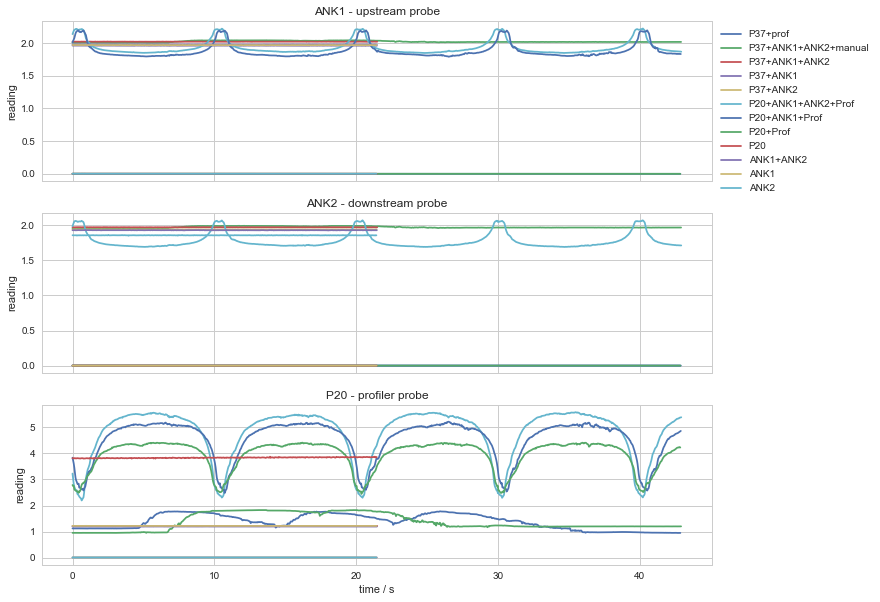

In [21]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharex=True)

labels = ['P37+prof','P37+ANK1+ANK2+manual','P37+ANK1+ANK2','P37+ANK1','P37+ANK2','P20+ANK1+ANK2+Prof',
          'P20+ANK1+Prof', 'P20+Prof','P20','ANK1+ANK2','ANK1','ANK2'] 
   
filepaths = ['../probe_interference_19may19/P37_manual.mat',
             '../probe_interference_19may19/P37_moving_ANK1_ANK2.mat',
             '../probe_interference_19may19/P37_ANK1_ANK2_2.mat',
             '../probe_interference_19may19/P37_ANK1.mat',
             '../probe_interference_19may19/P37_ANK2.mat',
             '../probe_interference_19may19/P20_ANK1_ANK2_profiler.mat',
             '../probe_interference_19may19/P20_ANK1_profiler.mat',
             '../probe_interference_19may19/P20_profiler.mat',
             '../probe_interference_19may19/P20.mat',
             '../probe_interference_19may19/ANK1_ANK2.mat',
             '../probe_interference_19may19/ANK1.mat',
             '../probe_interference_19may19/ANK2.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

### Base levels 
Runs without a profiler. What is the base reading of each probe when one or two of the other probes are connected? P37 may vary because the tip of the probe was sometimes a bit deeper than the surface.

Text(0.5,0,'time / s')

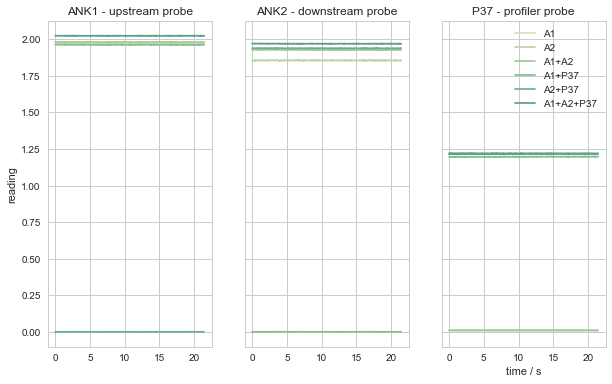

In [22]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(10,6), sharey=True)

labels = ['A1', 'A2','A1+A2', 'A1+P37', 'A2+P37', 'A1+A2+P37']

filepaths = ['../probe_interference_19may19/ANK1.mat',
             '../probe_interference_19may19/ANK2.mat',
             '../probe_interference_19may19/ANK1_ANK2.mat',
             '../probe_interference_19may19/P37_ANK1.mat',
             '../probe_interference_19may19/P37_ANK2.mat',
             '../probe_interference_19may19/P37_ANK1_ANK2_2.mat',
             ]
sns.set_palette(sns.hls_palette(len(filepaths), l=.5, s=0.4))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P37 - profiler probe')
ax2.set_xlabel('time / s')

Text(0.5,1,'P37 - profiler probe')

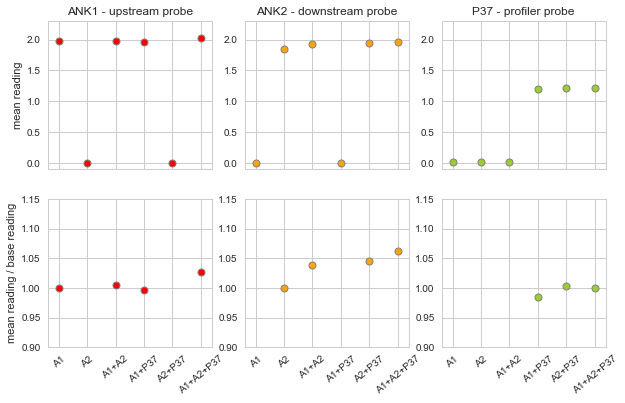

In [23]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3, figsize=(10,6), sharex=True)

labels = ['A1', 'A2','A1+A2', 'A1+P37', 'A2+P37', 'A1+A2+P37']

filepaths = ['../probe_interference_19may19/ANK1.mat',
             '../probe_interference_19may19/ANK2.mat',
             '../probe_interference_19may19/ANK1_ANK2.mat',
             '../probe_interference_19may19/P37_ANK1.mat',
             '../probe_interference_19may19/P37_ANK2.mat',
             '../probe_interference_19may19/P37_ANK1_ANK2_2.mat',
             ]
P1_mean = np.zeros(len(filepaths))
P2_mean = np.zeros(len(filepaths))
P3_mean = np.zeros(len(filepaths))

for filepath, lab, ii in zip(filepaths, labels, range(len(filepaths))):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])
    P1_mean[ii] = np.nanmean(P1)
    P2_mean[ii] = np.nanmean(P2)
    P3_mean[ii] = np.nanmean(P3)
    
ax0.scatter(labels,P1_mean, c='red', edgecolors='0.5',linewidths=1)
ax1.scatter(labels,P2_mean, c='orange', edgecolors='0.5',linewidths=1)
ax2.scatter(labels,P3_mean, c='yellowgreen', edgecolors='0.5',linewidths=1)

ax3.scatter(labels,P1_mean/P1_mean[0], c='red', edgecolors='0.5',linewidths=1)
ax4.scatter(labels,P2_mean/P2_mean[1], c='orange', edgecolors='0.5',linewidths=1)
ax5.scatter(labels,P3_mean/P3_mean[5], c='yellowgreen', edgecolors='0.5',linewidths=1)

for ax in [ax3,ax4,ax5]:
    ax.tick_params(axis='x', rotation=40)
    ax.set_ylim(0.9,1.15)
for ax in [ax0,ax1,ax2]:
    ax.tick_params(axis='x', rotation=40)
    ax.set_ylim(-0.1,2.3)

ax0.set_ylabel('mean reading')
ax3.set_ylabel('mean reading / base reading')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P37 - profiler probe')

#ax2.set_xlabel('time / s')

All probes interact, even using P37. But as we wil see, ANK1 and ANK2 don't have a big signal when P37 has a big reading (pribably because ANK2 and 1 have larger base readings than P37 anyway)

### Profiles

Text(0.5,0,'time / s')

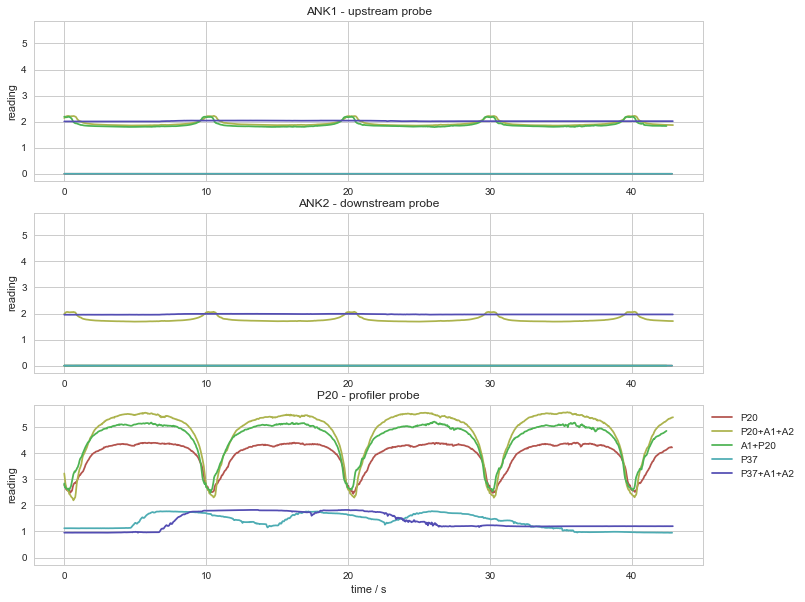

In [24]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharey=True)

labels = ['P20','P20+A1+A2','A1+P20', 'P37', 'P37+A1+A2']

filepaths = ['../probe_interference_19may19/P20_profiler.mat',
             '../probe_interference_19may19/P20_ANK1_ANK2_profiler.mat',
             '../probe_interference_19may19/P20_ANK1_profiler.mat',
             '../probe_interference_19may19/P37_manual.mat',
             '../probe_interference_19may19/P37_moving_ANK1_ANK2.mat',   
            ]
ini_indices = [0,0,10,0,0,10]
sns.set_palette(sns.hls_palette(len(filepaths), l=.5, s=0.5))
for filepath, lab, ind in zip(filepaths, labels, ini_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time[ind:]-time[ind],P1[ind:], label=lab)
    ax1.plot(time[ind:]-time[ind],P2[ind:], label=lab)
    ax2.plot(time[ind:]-time[ind],P3[ind:], label=lab)

ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')
ax2.set_ylabel('reading')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

### Appendix: How to convert profiler time to distance travelled?

In [25]:
tt = np.linspace(0,40,100)
H = -9.5 # cm
A = H/2 
B = H/2 
omega = 0.63
dd = A*np.sin(omega*tt-np.pi/2)+B

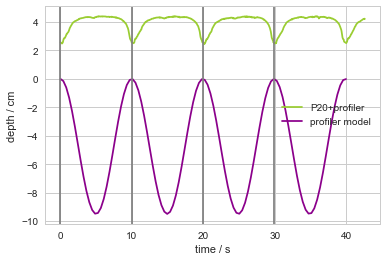

In [26]:
ind=5
fig,ax = plt.subplots(1,1,figsize=(6,4))

file = '../probe_interference_19may19/P20_profiler.mat'
mat = sio.loadmat(file, squeeze_me=True)
P3 = mat['ch3']#dens_C(mat['ch2'])
time = mat['time']

ax.plot(time[ind:]-time[ind],P3[ind:], label='P20+profiler', color='yellowgreen')
ax.plot(tt,dd, label='profiler model', color='darkmagenta')
ax.legend()
ax.set_xlabel('time / s')
ax.set_ylabel('depth / cm')

ax.axvline((0*np.pi)/omega, color='0.5')
ax.axvline((2*np.pi)/omega, color='0.5')
ax.axvline((4*np.pi)/omega, color='0.5')
ax.axvline((6*np.pi)/omega, color='0.5')

In [27]:
def time_to_dist(time, tot_dep=9.5, omega=0.545, offset=0):
    '''default values: 
    omega = 0.545
    tot_dep = 9.5 cm, total depth the probe travels from surface to bottom
    offset = 0 s, we want to start at the top of the probe cycle'''
    tt = time-offset
    tot_dep = -9.5 # cm
    A = tot_dep/2 
    B = tot_dep/2 
    omega = 0.63
    dist = A*np.sin(omega*tt-np.pi/2)+B
    return tt, dist

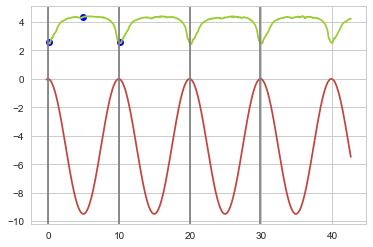

In [28]:
ind = 5
time_prof, dist_prof = time_to_dist(time, offset=time[ind])

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(time[ind],P3[ind],'ob')
ax.plot(time[238],P3[238],'ob')
ax.plot(time[int((238-ind)/2)],P3[int((238-ind)/2)],'ob')

ax.plot(time_prof, dist_prof)
ax.plot(time[ind:]-time[ind],P3[ind:], label='P20+profiler', color='yellowgreen')
ax.axvline((0*np.pi)/omega, color='0.5')
ax.axvline((2*np.pi)/omega, color='0.5')
ax.axvline((4*np.pi)/omega, color='0.5')
ax.axvline((6*np.pi)/omega, color='0.5')

1.009878369189802
1.0256123565681894


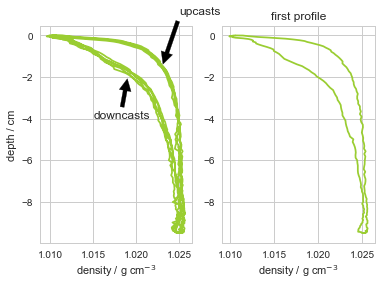

In [29]:
fig,ax = plt.subplots(1,2,figsize=(6,4))

ax[0].plot(densP(P3[ind:]),dist_prof[ind:], label='P20+profiler', color='yellowgreen')
ax[1].plot(densP(P3[ind:238]),dist_prof[ind:238], label='P20+profiler', color='yellowgreen')

ax[0].set_xlabel('density / g cm$^{-3}$')
ax[1].set_xlabel('density / g cm$^{-3}$')
ax[0].set_ylabel('depth / cm')
ax[1].set_title('first profile')
ax[0].annotate('downcasts', xy=(1.019, -2), xytext=(1.015, -4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[0].annotate('upcasts', xy=(1.023, -1.5), xytext=(1.025, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
print(np.min(densP(P3[ind:238])))
print(np.max(densP(P3[ind:238])))

For these profiles I made sure there was little friction between the probe and the metal hooks that keep it in place going up and down. The profiler goes down faster than it goes up so there is a mismatch between downcast and upcast.

-9.491133922231185 -2.8615761078853392


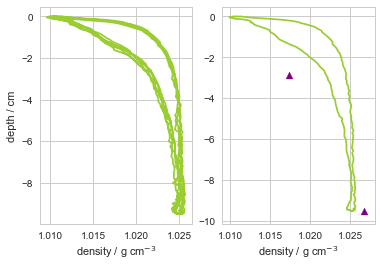

In [30]:
fig,ax = plt.subplots(1,2,figsize=(6,4))

ax[0].plot(densP(P3[ind:]),dist_prof[ind:], label='P20+profiler', color='yellowgreen')
ax[1].plot(densP(P3[ind:238]),dist_prof[ind:238], label='P20+profiler', color='yellowgreen')
ax[1].scatter(1.01727,dist_prof[48], marker='^', color='purple')
ax[1].scatter(1.02674,dist_prof[119], marker='^', color='purple')

ax[0].set_xlabel('density / g cm$^{-3}$')
ax[1].set_xlabel('density / g cm$^{-3}$')
ax[0].set_ylabel('depth / cm')
print(dist_prof[119],dist_prof[48])

The tirangles correspond to density measured in a couple of samples at shelf break depth and bottom. I don't thing the profiler is "sinusioidal" enough... I have to use imagej to track the profiler arm and get a better mapping function.

Text(0,0.5,'vel / ms$^{-1}$')

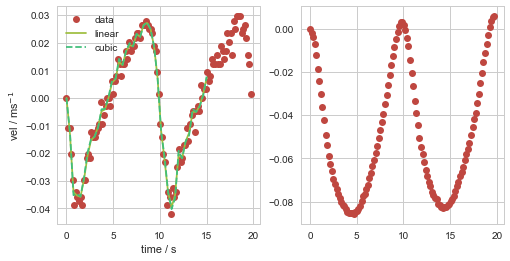

In [34]:
# Find interp function velocity of the profiler
df = pd.read_csv('mass_A.txt', delim_whitespace=True, header=1)

time_p = np.array(df['t'][28:]-df['t'][28])
ydist = np.array(df['y'][28:])

time_small = time_p[0:-1]
vel = (ydist[1:]-ydist[:-1])/(time_p[1:]-time_p[:-1])

f = interp1d(time_small, vel)
f2 = interp1d(time_small, vel, kind='cubic')

xnew = np.linspace(0, 15, num=41, endpoint=True)
dist = np.zeros(np.shape(time_small))

for ii in range(1,len(vel)):
    dist[ii] = (vel[ii]*(time_small[ii]-time_small[ii-1]))+dist[ii-1] 

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(time_small, vel, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
ax[1].plot(time_small, dist, 'o')

ax[0].legend(['data', 'linear', 'cubic'], loc='best')
ax[0].set_xlabel('time / s')
ax[0].set_ylabel('vel / ms$^{-1}$')

Text(1.025,0.01,'upcast')

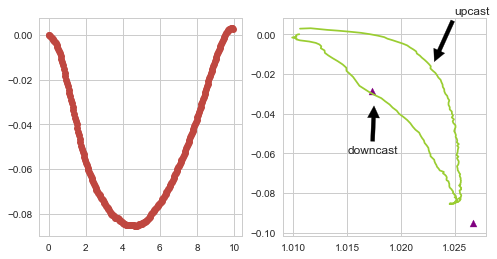

In [54]:
# get a velocity
time_int = time[ind:238]-time[ind]
vel_int = f(time_int)
dist_int = np.zeros(np.shape(time_int))

for ii in range(1,len(time_int)):
    dist_int[ii] = (vel_int[ii]*(time_int[ii]-time_int[ii-1]))+dist_int[ii-1] 

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(time_int, dist_int, 'o')
ax[1].plot(densP(P3[ind:238]),dist_int, label='P20+profiler', color='yellowgreen')
ax[1].scatter(1.01727,-0.0285, marker='^', color='purple')
ax[1].scatter(1.02674,-0.095, marker='^', color='purple')
ax[1].annotate('downcast', xy=(1.0175, -0.035), xytext=(1.015, -0.06),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1].annotate('upcast', xy=(1.023, -0.015), xytext=(1.025, 0.01),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
